## Importing Libraries

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

## Loading dataset

In [142]:
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Dropping columns

In [144]:
#data.drop(['id','Unnamed: 32'], axis=1, inplace=True)
data.drop(['id','Unnamed: 32'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [145]:
data['diagnosis'] = [1 if k == "M" else 0 for k in data['diagnosis']]

## Input and output data

In [146]:
y = data['diagnosis'].values
x_data = data.drop(['diagnosis'], axis=1)

## Normalization

In [147]:
#x = ((x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))).values
x = ((x_data - x_data.min()) / (x_data.max() - x_data.min())).values

## Splitting train and test data

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 40)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (30, 455)
x test:  (30, 114)
y train:  (455,)
y test:  (114,)


## Weight and bias

In [149]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = 0.0
    return w, b

## Sigmoid function - calculating z value

In [150]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

## Forward backward propagation

In [151]:
def forward_backward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    cost = (np.sum(loss)) / x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train, ((y_head - y_train).T))) / x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return cost, gradients

## Updating parameters

In [152]:
def update(w, b, x_train, y_train, learning_rate, number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    for i in range(number_of_iteration):
        # make forward and backward propagations and find cost and gradient
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
        #update
        w = w - learning_rate * gradients['derivative_weight']
        b = b - learning_rate * gradients['derivative_bias']
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration % i: % f" %(i, cost))
    # update weights and bias
    parameters = {"weight": w, "bias": b}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation = 'vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

## Prediction

In [153]:
def predict(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test)+b)
    y_prediction = np.zeros((1, x_test.shape[1]))
    # if z>0.5 then prediction is 1 else 0
    for i in range(z.shape[1]):
        if z[0, i]<= 0.5:
            y_prediction[0,i]=0
        else:
            y_prediction[0,i]=1
    return y_prediction

## Logistic regression

Cost after iteration  0:  0.201523
Cost after iteration  10:  0.071155
Cost after iteration  20:  0.048076
Cost after iteration  30:  0.035250
Cost after iteration  40:  0.027155
Cost after iteration  50:  0.021580
Cost after iteration  60:  0.017503
Cost after iteration  70:  0.014390
Cost after iteration  80:  0.011933
Cost after iteration  90:  0.009944


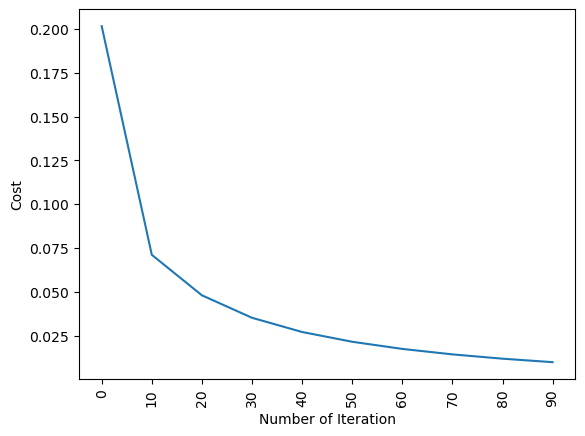

Train accuracy: 94.72527472527473 %
Test accuracy: 95.6140350877193 %


In [154]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train)

    #errors
    print("Train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("Test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

logistic_regression(x_train, y_train, x_test, y_test, learning_rate = 1, num_iterations = 100)

## Result of linear_model.LogisticRegression

In [155]:
logreg = linear_model.LogisticRegression(random_state = 40, max_iter = 150)
print("Train accuracy: {}".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))
print("Test accuracy: {}".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))

Train accuracy: 0.9692307692307692
Test accuracy: 0.9912280701754386
